CRISP-DM Pipeline for HousingData.xlsx
1. Business Understanding

The main goal is to analyze housing and neighborhood data to understand how socio-economic, environmental, and infrastructural factors interact.
Applications include:

Clustering neighborhoods with similar socio-economic conditions.

Identifying important factors influencing housing-related challenges.

Supporting decision-making in urban planning and real estate.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from math import sqrt

2. Data Understanding

In [2]:
# loading the dataset
df = pd.read_excel("C:/Users/HP/Big Data/Assignments/Assignment2/HousingData.xlsx")

In [3]:
# Quick overview
print("df shape", df.shape)

df shape (506, 15)


In [4]:
# printing the first five rows of the dataset
print(df.head())

   PID     CRIM    AC  INDUS   LS     PR     RM   AGE     DIS  RAD  PTRATIO  \
0  101  0.00632  18.0   2.31  0.0  0.538  6.575  65.2  4.0900  1.0     15.3   
1  102  0.02731   0.0   7.07  0.0  0.469  6.421  78.9  4.9671  2.0     17.8   
2  103  0.02729   0.0   7.07  0.0  0.469  7.185  61.1  4.9671  2.0     17.8   
3  104  0.03237   0.0   2.18  0.0  0.458  6.998  45.8  6.0622  3.0     18.7   
4  105  0.06905   0.0   2.18  0.0  0.458  7.147  54.2  6.0622  3.0     18.7   

      DMT  LSTAT   MO    TAX  
0  396.90   4.98  2.0  296.0  
1  396.90   9.14  2.0  242.0  
2  292.40   4.03  3.0  242.0  
3  394.63   2.94  0.0  222.0  
4  396.90   5.33  0.0  222.0  


In [5]:
# Summary statistics
print(df.describe())

              PID        CRIM          AC       INDUS          LS          PR  \
count  506.000000  504.000000  506.000000  506.000000  504.000000  503.000000   
mean   353.500000    3.604056   11.363636   11.136779    0.069444    0.554164   
std    146.213884    8.609134   23.322453    6.860353    0.254461    0.115830   
min    101.000000    0.006320    0.000000    0.460000    0.000000    0.385000   
25%    227.250000    0.082155    0.000000    5.190000    0.000000    0.449000   
50%    353.500000    0.256510    0.000000    9.690000    0.000000    0.538000   
75%    479.750000    3.674808   12.500000   18.100000    0.000000    0.624000   
max    606.000000   88.976200  100.000000   27.740000    1.000000    0.871000   

               RM        AGE         DIS         RAD     PTRATIO         DMT  \
count  502.000000  502.00000  503.000000  504.000000  503.000000  502.000000   
mean     6.285307   68.53008    3.796207    9.492063   18.443539  305.414530   
std      0.704098   28.13882  

In [6]:
# Check missing values.Counts missing values per column.
print(df.isnull().sum())

PID        0
CRIM       2
AC         0
INDUS      0
LS         2
PR         3
RM         4
AGE        4
DIS        3
RAD        2
PTRATIO    3
DMT        4
LSTAT      1
MO         2
TAX        1
dtype: int64


Where there is non-zero values, it means we must clean/fill them before analysis. we can use mean to handle those missing values.

3. Data Preparation

In [7]:
# Handling missing values (because, i found many)
df = df.fillna(df.mean())

That above replaces missing values with the mean of each column

In [8]:
# Select numeric features
features = df.select_dtypes(include=['float64', 'int64'])

In [9]:
# Standardize
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

In [10]:
# Convert back to DataFrame
df_scaled = pd.DataFrame(scaled_data, columns=features.columns)
print(df_scaled.head())

        PID      CRIM        AC     INDUS        LS        PR        RM  \
0 -1.728631 -0.419142  0.284830 -1.287909 -0.273721 -0.140108  0.413487   
1 -1.721785 -0.416697 -0.487722 -0.593381 -0.273721 -0.738179  0.193679   
2 -1.714939 -0.416699 -0.487722 -0.593381 -0.273721 -0.738179  1.284157   
3 -1.708093 -0.416107 -0.487722 -1.306878 -0.273721 -0.833524  1.017246   
4 -1.701247 -0.411834 -0.487722 -1.306878 -0.273721 -0.833524  1.229918   

        AGE       DIS       RAD   PTRATIO       DMT     LSTAT        MO  \
0 -0.118934  0.140242 -0.981641 -1.457349  0.643679 -1.075713  0.757504   
1  0.370362  0.558924 -0.866045 -0.298345  0.643679 -0.492587  0.757504   
2 -0.265365  0.558924 -0.866045 -0.298345 -0.091568 -1.208879  1.316482   
3 -0.811805  1.081669 -0.750450  0.118896  0.627707 -1.361669 -0.360452   
4 -0.511799  1.081669 -0.750450  0.118896  0.643679 -1.026652 -0.360452   

        TAX  
0 -0.665122  
1 -0.986590  
2 -0.986590  
3 -1.105652  
4 -1.105652  


4. Modeling
(a) Clustering (K-Means)

In [11]:
# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df_scaled["Cluster"] = kmeans.fit_predict(df_scaled)

print(df_scaled["Cluster"].value_counts())

Cluster
2    208
0    162
1    136
Name: count, dtype: int64


That above shows how many neighborhoods belong to each cluster.

(b) Correlation Analysis

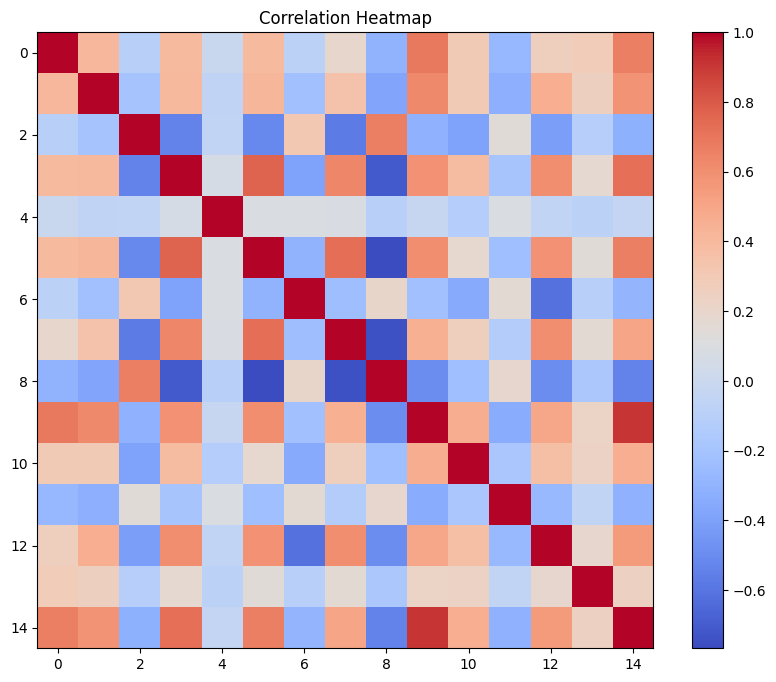

In [12]:
# Correlation matrix
corr = df.corr()

plt.figure(figsize=(10,8))
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.title("Correlation Heatmap")
plt.show()

The heatmap shows how variables are related:

Dark red = strong positive correlation (when one increases, the other increases).

Dark blue = strong negative correlation (when one increases, the other decreases).

That shows:
LSTAT (low-status population %) and CRIM → positive correlation (poorer areas have more crime).

RM (rooms per dwelling) and PR (pollution) → negative correlation (better housing areas often have less pollution).

PTRATIO (pupil–teacher ratio) and LSTAT → positive correlation (poorer areas often have worse education).

(c) Simple Regression

In [13]:
# Predict Pollution (PR) using Crime (CRIM) and Rooms (RM)
X = df[["CRIM", "RM"]]
y = df["PR"]

model = LinearRegression()
model.fit(X, y)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R^2 Score:", model.score(X, y))

Coefficients: [ 0.00496463 -0.03604179]
Intercept: 0.7628053161097075
R^2 Score: 0.2195710337289014


1. Coefficients
0.00496463 (for CRIM):
This is a positive coefficient; As crime rate increases, pollution (PR) also tends to increase slightly.

-0.03604179 (for RM):
This is a negative coefficient; As the number of rooms increases (better housing quality), pollution tends to decrease.

2. Intercept =  0.7628053161097075
This is the baseline pollution level (PR) when both CRIM and RM are 0.

It’s just a starting point for the regression line and is less important than the coefficients.

3. R² Score = 0.22
R² tells us how much of the variation in pollution is explained by crime + rooms.
Here it is 0.22 = 22%, which is quite low.

That means: crime rate and number of rooms only explain 22% of the pollution differences; other factors (like industry, traffic, geography, among others.) are also important.